Katherine (Kate) Wall, Frances Brito, Jie (Ginny) Zhu

# I. Data download & Extraction steps

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
%%bash
#wget https://storage.googleapis.com/synthea-public/historical/synthea_1m_fhir_3_0_May_24.tar.gz
#tar -xvzf synthea_1m_fhir_3_0_May_24.tar.gz
#cd synthea_1m_fhir_3_0_May_24
#for f in *.tar.gz;
#do 
#    tar -xvzf "$f"
#done

# II. Testing steps

In [7]:
%%bash
#navigate to home directory, then to unzipped directory
cd
cd synthea_1m_fhir_3_0_May_24

#loop through the folders and print the names of the csv files of interest
for i in */; 
do 
    echo "in $i:"
    cd $i/csv
    var=($(ls)) #var is an array
    echo ${var[7]} #print the value of var at index 7 (confirm patients file is always the 7th file)
    wc -l patients.csv #print the number of lines in that patients file
    wc -l encounters.csv #print the number of lines in that patients file
    printf "\n" #line break, used printf because echo wasn't working
    cd ../..
done

in output_1/:
patients.csv
132916 patients.csv
1263670 encounters.csv

in output_10/:
patients.csv
132128 patients.csv
1261550 encounters.csv

in output_11/:
patients.csv
132570 patients.csv
1253731 encounters.csv

in output_12/:
patients.csv
133110 patients.csv
1257046 encounters.csv

in output_2/:
patients.csv
133460 patients.csv
1261268 encounters.csv

in output_3/:
patients.csv
132708 patients.csv
1260371 encounters.csv

in output_4/:
patients.csv
132857 patients.csv
1258339 encounters.csv

in output_5/:
patients.csv
133469 patients.csv
1257519 encounters.csv

in output_6/:
patients.csv
132826 patients.csv
1263159 encounters.csv

in output_7/:
patients.csv
132722 patients.csv
1255620 encounters.csv

in output_8/:
patients.csv
133071 patients.csv
1255551 encounters.csv

in output_9/:
patients.csv
133225 patients.csv
1261615 encounters.csv



# III. Compilation step & Validation steps

In [11]:
%%bash
#create empty csv with the header only
cd
touch patients_all.csv
head -n 1 synthea_1m_fhir_3_0_May_24/output_1/csv/patients.csv >> patients_all.csv
#append to patients_all.csv through loop
cd synthea_1m_fhir_3_0_May_24
for i in */; 
do 
    cd $i/csv
    tail -n +2 patients.csv >> /home/g2_kate_wall/patients_all.csv #append line 2 to end to patients_all.csv
    cd ../..
done

cd
touch encounters_all.csv
head -n 1 synthea_1m_fhir_3_0_May_24/output_1/csv/encounters.csv >> encounters_all.csv
cd synthea_1m_fhir_3_0_May_24
for i in */; 
do 
    cd $i/csv
    tail -n +2 encounters.csv >> /home/g2_kate_wall/encounters_all.csv #append line 2 to end to csv_all.csv
    cd ../..
done

In [112]:
%%bash
wc -l patients_all.csv
wc -l encounters_all.csv

1595051 patients_all.csv
15109428 encounters_all.csv


We can now see patients_all.csv is in the home directory, and it contains 1,595,051 lines as expected. We can also see encounters_all.csv contains 15,109,428 lines.

# IV. Data Manipulation on Test Set

In [116]:
%%bash
rm small_test_patients.csv
rm small_test_encounters.csv
head -n 5 patients_all.csv >> small_test_patients.csv
head -n 10 encounters_all.csv >> small_test_encounters.csv
rm small_test_test.csv
rm small_test_final.csv

#clear out junk lines after column 17: Address
awk -F , 'BEGIN{OFS=","} {print $1,$2,$3,$4,$5,$6,$7,$8,$9,$10,$11,$12,$13,$14,$15,$16,$17}' small_test_patients.csv > small_test_test.csv
#create a new file with filtered data
touch small_test_final.csv
head -n 1 patients_all.csv >> small_test_final.csv
#append rows filtered for the first column matching our pattern
cat small_test_test.csv | egrep '[[:alnum:]]{8}-[[:alnum:]]{4}-[[:alnum:]]{4}-[[:alnum:]]{4}-[[:alnum:]]{12}' >> small_test_final.csv

head -n 5 small_test_final.csv

ID,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS
33f33990-ae8b-4be8-938f-e47ad473abfe,1995-04-05,36d131ee-dd5b-4acb-acbe-19961c32c099,1997-05-18,,,999-84-9382999-69-7030,S99923464,false,Mr.,Nash950,Raynor678,,,,white,italian
660bec03-9e58-47f2-98b9-2f1c564f3838,1996-07-26,,999-70-3315,S99945940,false,Ms.,Geovany567,Reichert456,,,,white,irish,F,Fitchburg MA US,20810 Bart Inlet Eastham MA 02642 US
5125d2b2-3aef-4ae2-aa5c-335f7e206b92,1996-09-24,,999-89-6289,S99991246,false,Ms.,Tianna156,Kuphal267,,,,white,french_canadian,F,Westborough MA US,295 Walter Mill Dennis MA 02638 US


In order to generate the right functions for cleaning our patients and encounter files, we will do the initial file manipulations on smaller test datasets: small_test_patients.csv and & small_test_encounters.csv. 
For the patients set, we will cut any data outside of the first 17 columns (ID:ADDRESS) in each row.
Then, we will filter out any rows without the patient ID pattern of 8char-4char-4char-4char-12char in at least one column.

In [32]:
%%bash
rm encounters_all_patientids.csv
wc -l encounters_all.csv
awk -F , 'BEGIN{OFS=","} {print $3}' encounters_all.csv >> encounters_all_patientids.csv
egrep '[[:alnum:]]{8}-[[:alnum:]]{4}-[[:alnum:]]{4}-[[:alnum:]]{4}-[[:alnum:]]{12}' encounters_all_patientids.csv | wc -l

15109428 encounters_all.csv
15109427


For the encounters set, we find all rows (except the header) in the encounters file have patient IDs that match our patient ID pattern of 8char-4char-4char-4char-12char. It appears to be clean and has equal numbers of comma delimiters on each line.

In [117]:
#goal header - [ID,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,
#               ETHNICITY,GENDER,
#               Enc_DATE = list of encounter dates per patient, 
#               Enc_CODE = list of encounter codes per patient]
patients_test= pd.read_csv('small_test_final.csv')
encounters_test= pd.read_csv('small_test_encounters.csv')
patients_test.rename(columns={'ID':'PATIENT_ID'}, inplace=True)
encounters_test.rename(columns={'PATIENT':'PATIENT_ID'}, inplace=True)
df_grouped = encounters_test.groupby(['PATIENT_ID']).agg(lambda g: list(g))
df_grouped.drop(columns=['ID', 'DESCRIPTION','REASONCODE','REASONDESCRIPTION'],inplace=True)
comb_table = pd.DataFrame.merge(patients_test,df_grouped,how='left',on='PATIENT_ID')
comb_table

,PATIENT_ID,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,DATE,CODE
0,33f33990-ae8b-4be8-938f-e47ad473abfe,1995-04-05,36d131ee-dd5b-4acb-acbe-19961c32c099,1997-05-18,NaN,NaN,999-84-9382999-69-7030,S99923464,false,Mr.,Nash950,Raynor678,NaN,NaN,NaN,white,italian,"[2011-07-02, 2012-06-17, 2013-07-14, 2014-01-0...","[170258001, 170258001, 185349003, 185345009, 1..."
1,660bec03-9e58-47f2-98b9-2f1c564f3838,1996-07-26,NaN,999-70-3315,S99945940,False,Ms.,Geovany567,Reichert456,NaN,NaN,NaN,white,irish,F,Fitchburg MA US,20810 Bart Inlet Eastham MA 02642 US,NaN,NaN
2,5125d2b2-3aef-4ae2-aa5c-335f7e206b92,1996-09-24,NaN,999-89-6289,S99991246,False,Ms.,Tianna156,Kuphal267,NaN,NaN,NaN,white,french_canadian,F,Westborough MA US,295 Walter Mill Dennis MA 02638 US,NaN,NaN


In [85]:
comb_table[['CODE']].apply((lambda x: x),axis=1)

,CODE
0,"[170258001, 170258001, 185349003, 185345009, 1..."
1,NaN
2,NaN


In [84]:
comb_table[['CODE']].apply((lambda x: len(x[0]) if type(x[0])==list else 0),axis=1)

0    5
1    0
2    0
dtype: int64

In [87]:
comb_table['ENC_DATE_COUNT']=comb_table[['DATE']].apply((lambda x: len(x[0]) if type(x[0])==list else 0),axis=1)
comb_table

,PATIENT_ID,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,DATE,CODE,ENC_DATE_COUNT
0,33f33990-ae8b-4be8-938f-e47ad473abfe,1995-04-05,36d131ee-dd5b-4acb-acbe-19961c32c099,1997-05-18,NaN,NaN,999-84-9382999-69-7030,S99923464,false,Mr.,Nash950,Raynor678,NaN,NaN,NaN,white,italian,"[2011-07-02, 2012-06-17, 2013-07-14, 2014-01-0...","[170258001, 170258001, 185349003, 185345009, 1...",5
1,660bec03-9e58-47f2-98b9-2f1c564f3838,1996-07-26,NaN,999-70-3315,S99945940,False,Ms.,Geovany567,Reichert456,NaN,NaN,NaN,white,irish,F,Fitchburg MA US,20810 Bart Inlet Eastham MA 02642 US,NaN,NaN,0
2,5125d2b2-3aef-4ae2-aa5c-335f7e206b92,1996-09-24,NaN,999-89-6289,S99991246,False,Ms.,Tianna156,Kuphal267,NaN,NaN,NaN,white,french_canadian,F,Westborough MA US,295 Walter Mill Dennis MA 02638 US,NaN,NaN,0


Using the small test data, we were able to merge the patients and encounters data on PATIENT_ID, using the patients file as a basis. Then, we could count the length of each patient's encounter DATE list using a lambda function that counts the length if there is a list or prints zero if the value is null. This ENC_DATE_COUNT column was appended to the DataFrame for sorting purposes.

# V. Data Manipulation on Real Sets: patients_all.csv & encounters_all.csv

In [100]:
%%bash
rm patients_all_filtered.csv
rm patients_all_mid_filtered.csv

awk -F , 'BEGIN{OFS=","} {print $1,$2,$3,$4,$5,$6,$7,$8,$9,$10,$11,$12,$13,$14,$15,$16,$17}' patients_all.csv > patients_all_mid_filtered.csv
head -n 1 patients_all.csv >> patients_all_filtered.csv
cat patients_all_mid_filtered.csv | egrep '[[:alnum:]]{8}-[[:alnum:]]{4}-[[:alnum:]]{4}-[[:alnum:]]{4}-[[:alnum:]]{12}' >> patients_all_filtered.csv
wc -l patients_all_filtered.csv

1592974 patients_all_filtered.csv


The final filtered patients file contains 1,592,974 lines. It can now be read into a pandas dataframe.

In [101]:
patients= pd.read_csv('patients_all_filtered.csv')
print(patients.head())
encounters= pd.read_csv('encounters_all.csv')
print(encounters.head())

                                     ID   BIRTHDATE  \
0  33f33990-ae8b-4be8-938f-e47ad473abfe  1995-04-05   
1  660bec03-9e58-47f2-98b9-2f1c564f3838  1996-07-26   
2  5125d2b2-3aef-4ae2-aa5c-335f7e206b92  1996-09-24   
3  26626faf-cbd5-48d5-a3bf-a7b21ae08e4b  1944-09-01   
4  f509a0f0-77ef-477f-977d-e2784a241b52  1964-05-14   

                              DEATHDATE          SSN    DRIVERS    PASSPORT  \
0  36d131ee-dd5b-4acb-acbe-19961c32c099   1997-05-18        NaN         NaN   
1                                   NaN  999-70-3315  S99945940       false   
2                                   NaN  999-89-6289  S99991246       false   
3                            2015-09-04  999-79-2204  S99913823  X19963891X   
4                            2010-07-11  999-70-3377  S99930834       false   

                   PREFIX       FIRST          LAST SUFFIX    MAIDEN  \
0  999-84-9382999-69-7030   S99923464         false    Mr.   Nash950   
1                     Ms.  Geovany567   Reichert45

In [102]:
#Rename the column on which to join: PATIENT_ID
patients.rename(columns={'ID':'PATIENT_ID'}, inplace=True)
encounters.rename(columns={'PATIENT':'PATIENT_ID'}, inplace=True)

#Aggregate the encounters data under PATIENT_ID. Drop columns we are not interested in.
enc_grouped = encounters.groupby(['PATIENT_ID']).agg(lambda g: list(g))
enc_grouped.drop(columns=['ID', 'DESCRIPTION','REASONCODE','REASONDESCRIPTION'],inplace=True)

#Merge the tables together into a new table. Add the ENC_DATE_COUNT column for sorting.
combined_table = pd.DataFrame.merge(patients,enc_grouped,how='left',on='PATIENT_ID')
combined_table['ENC_DATE_COUNT']=combined_table[['DATE']].apply((lambda x: len(x[0]) if type(x[0])==list else 0),axis=1)
combined_table.sort_values(by=['ENC_DATE_COUNT'],ascending=True,inplace=True)

,PATIENT_ID,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,DATE,CODE,ENC_DATE_COUNT
382121,bdcf4a19-9cf8-4232-9768-ac31b80c118e,1938-09-02,2004-03-12,999-11-9940,S99953650,false,Mr.,Matteo575,Gaylord584,NaN,NaN,M,white,american,M,Lynn MA US,145 Garnet Mountains Sturbridge MA 01566 US,NaN,NaN,0
541858,bc9d4e8e-2e08-4c19-8e76-24f015304596,1967-12-26,2007-12-12,999-34-7715,S99938174,false,Mrs.,Erin640,Anderson442,NaN,Hoppe700,M,white,irish,F,Northampton MA US,926 Gerhold Vista Raynham MA 02767 US,NaN,NaN,0
1004363,c58be850-33ef-4a0a-9805-bf650dd04456,1935-12-25,2004-10-13,999-20-6615,S99992262,X36926628X,Mr.,Jermey300,Treutel299,NaN,NaN,M,white,french_canadian,M,Boston MA US,3552 Shaniya Prairie Suite 426 Weston MA 02493 US,NaN,NaN,0
1004364,bd900d9a-7a3e-413d-8b28-b64e04563dd7,1940-10-23,1999-01-06,999-18-3098,S99932280,false,Mrs.,Destany26,Osinski291,NaN,Hilll59,M,white,german,F,Leominster MA US,2930 Rico Cliff Suite 315 Waltham MA 02451 US,NaN,NaN,0
1004368,c3e777fa-c5a4-46db-b2df-f56f16b05af6,1918-09-06,2006-07-21,999-27-4500,S99926662,X29468486X,Mr.,Chaz158,Halvorson218,NaN,NaN,M,white,irish,M,Boston MA US,78723 Damion Landing Wayland MA 01778 US,NaN,NaN,0


In [119]:
#Print the first five lines.
combined_table.rename(columns={'DATE':'ENC_DATE', 'CODE': 'ENC_CODE'}, inplace=True)
combined_table.head()

,PATIENT_ID,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,ENC_Date,ENC_CODE,ENC_DATE_COUNT
382121,bdcf4a19-9cf8-4232-9768-ac31b80c118e,1938-09-02,2004-03-12,999-11-9940,S99953650,false,Mr.,Matteo575,Gaylord584,NaN,NaN,M,white,american,M,Lynn MA US,145 Garnet Mountains Sturbridge MA 01566 US,NaN,NaN,0
541858,bc9d4e8e-2e08-4c19-8e76-24f015304596,1967-12-26,2007-12-12,999-34-7715,S99938174,false,Mrs.,Erin640,Anderson442,NaN,Hoppe700,M,white,irish,F,Northampton MA US,926 Gerhold Vista Raynham MA 02767 US,NaN,NaN,0
1004363,c58be850-33ef-4a0a-9805-bf650dd04456,1935-12-25,2004-10-13,999-20-6615,S99992262,X36926628X,Mr.,Jermey300,Treutel299,NaN,NaN,M,white,french_canadian,M,Boston MA US,3552 Shaniya Prairie Suite 426 Weston MA 02493 US,NaN,NaN,0
1004364,bd900d9a-7a3e-413d-8b28-b64e04563dd7,1940-10-23,1999-01-06,999-18-3098,S99932280,false,Mrs.,Destany26,Osinski291,NaN,Hilll59,M,white,german,F,Leominster MA US,2930 Rico Cliff Suite 315 Waltham MA 02451 US,NaN,NaN,0
1004368,c3e777fa-c5a4-46db-b2df-f56f16b05af6,1918-09-06,2006-07-21,999-27-4500,S99926662,X29468486X,Mr.,Chaz158,Halvorson218,NaN,NaN,M,white,irish,M,Boston MA US,78723 Damion Landing Wayland MA 01778 US,NaN,NaN,0


In [120]:
#Print the last five lines
combined_table.tail()

,PATIENT_ID,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,ENC_Date,ENC_CODE,ENC_DATE_COUNT
447646,1061f48a-70db-412e-ab0d-7fc244425fba,1998-04-08,NaN,999-80-2781,S99957919,NaN,Ms.,Rene713,Okuneva477,NaN,NaN,NaN,white,portuguese,F,Boston MA US,9986 Sipes Island Belmont MA 02479 US,"[2010-12-01, 2011-01-11, 2011-01-07, 2011-02-1...","[184347001, 170258001, 184347001, 184347001, 1...",132
648405,c90990da-b9d4-49c8-8a55-d63040e3ae9a,1998-05-08,NaN,999-48-3143,S99932664,NaN,Mr.,Terence864,Wiza400,NaN,NaN,NaN,hispanic,puerto_rican,M,Braintree Town MA US,177 Hamill Avenue Suite 807 Sturbridge MA 0156...,"[2010-09-15, 2010-10-21, 2010-11-21, 2010-12-2...","[184347001, 184347001, 184347001, 184347001, 1...",133
577116,f8a94e83-9e76-492e-8148-e2dcf4f5eb12,1999-06-15,NaN,999-86-2181,S99992963,NaN,NaN,Filiberto440,Daugherty629,NaN,NaN,NaN,white,english,F,Cambridge MA US,856 Harmony Brooks Ashland MA 01721 US,"[2010-11-28, 2010-12-23, 2011-01-09, 2011-02-0...","[185347001, 185345009, 185347001, 170258001, 1...",141
1107434,c74586f6-16c1-4972-ace1-c46005c9a5d3,1998-07-02,NaN,999-63-6767,S99972748,NaN,Mr.,Beverly485,Rohan75,NaN,NaN,NaN,white,irish,M,Walpole MA US,39860 Amina Square Williamsburg MA 01096 US,"[2010-05-29, 2010-07-01, 2010-07-03, 2010-08-0...","[185347001, 185347001, 394701000, 185347001, 1...",142
509176,58792e4a-e012-4fec-a6ed-081b9cc073ce,2000-03-01,NaN,999-95-3571,S99990457,NaN,NaN,Brooks268,Kshlerin253,NaN,NaN,NaN,hispanic,central_american,F,Hanson MA US,1210 Diego Vista Suite 513 Leicester MA 01524 US,"[2010-06-01, 2010-07-13, 2010-07-31, 2010-08-1...","[185347001, 185347001, 170258001, 185347001, 1...",147


The combined_table DataFrame contains patient demographics from patients.csv's with encounter DATE and CODE lists from encounter.csv's. Each row contains a patient ID. It is sorted on the number of visits, found in the ENC_DATE_COUNT column, from 0 to 147 visits.

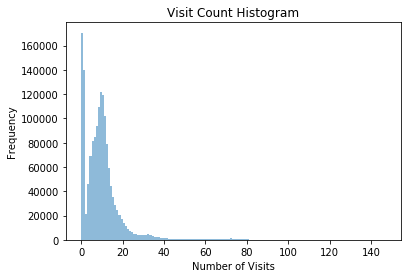

In [105]:
#Plot the distribution of the visit counts.
combined_table.ENC_DATE_COUNT.hist(bins=combined_table.ENC_DATE_COUNT.max(), histtype='stepfilled',alpha=0.5,grid=False,align='mid')
plt.title('Visit Count Histogram')
plt.ylabel('Frequency')
plt.xlabel('Number of Visits')
#plt.axis([1, 3, 0, 5])
x = combined_table.ENC_DATE_COUNT
plt.xticks(np.arange(min(x), max(x)+1, 20))
plt.show()

The distribution of visit counts can be found in the plot above. The visits are skewed right and bimodal. Many patients visit only once, but when patients do visit more than once, they tend to go around ~10 times. 

In [110]:
combined_table[combined_table['ENC_DATE_COUNT']==0].shape

(170574, 20)

170,574 patients do not have encounter information matching their PATIENT_ID in the encounters csv files.